# Power broadening

author: @SteveEckel

This little script tests the power broadening that should naturally come out
of the rate equation model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp
import pylcp.rateeq

### The simple two level case with a single laser:

Text(0, 0.5, '$R_{ge}/\\Gamma$')

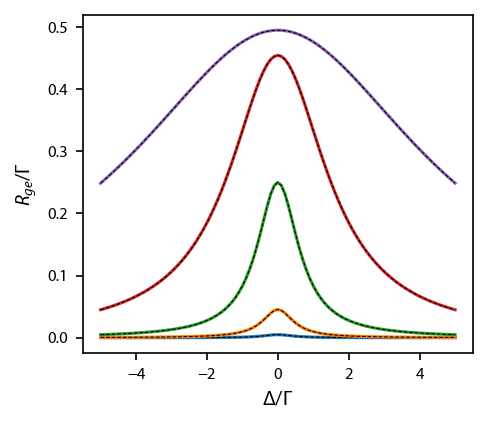

In [2]:
# Define a simple Hamiltonian F=0 to F=1:
Hg, Bgq = pylcp.hamiltonians.singleF(F=0, muB=0)
He, Beq = pylcp.hamiltonians.singleF(F=1, muB=1)

dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(0, 1)

ham = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

# Set a constant (very small) magnetic field to define a quant axis:
magField = lambda R: np.array([1e-5, 0.0, 0.0])

# Make two independent axes: dets/betas:
dets = np.arange(-5.0, 5.1, 0.1)
betas = np.logspace(-2, 2, 5)

fig, ax = plt.subplots(nrows=1, ncols=1)
for beta in betas:
    Rijl = np.zeros(dets.shape)
    Neq = np.zeros(dets.shape + (4,))
    for ii, det in enumerate(dets):
        laserBeams = pylcp.laserBeams([{'kvec':np.array([1., 0, 0.]), 'beta':beta,
                                        'pol':-1,  'delta':det}])
        rateeq = pylcp.rateeq(laserBeams, magField, ham)
        Neq[ii] = rateeq.equilibrium_populations(np.array([0., 0., 0.]),
                                                 np.array([0., 0., 0.]), 0.)
        Rijl[ii] = np.sum(rateeq.Rijl['g->e'], axis=2)[0][0]

    ax.plot(dets, Rijl*(Neq[:, 0]-Neq[:, 1]))
    ax.plot(dets, beta/2/(1+beta+4*dets**2), 'k--', linewidth=0.5)

ax.set_xlabel('$\Delta/\Gamma$')
ax.set_ylabel('$R_{ge}/\Gamma$')

### What about in the presence of two beams and two transitions?

Text(0, 0.5, '$R_{ge}/\\Gamma$')

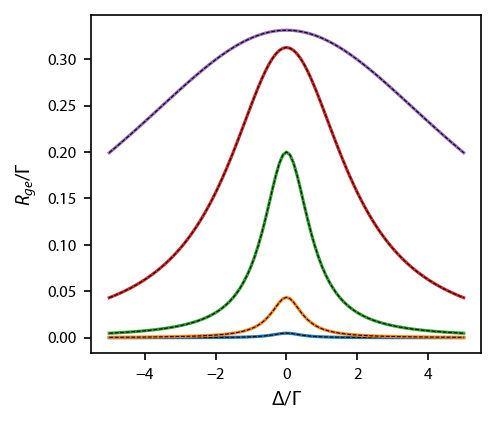

In [3]:
# Make two independent axes: dets/betas:
fig, ax = plt.subplots(nrows=1, ncols=1)
for beta in betas:
    Rijl = np.zeros(dets.shape + (2,))
    Neq = np.zeros(dets.shape + (4,))
    for ii, det in enumerate(dets):
        laserBeams = pylcp.laserBeams([{'kvec':np.array([1., 0, 0.]),
                                        'beta':beta, 'pol':-1, 'delta':det},
                                       {'kvec':np.array([-1., 0, 0.]),
                                        'beta':beta, 'pol':-1, 'delta':det}])
        rateeq = pylcp.rateeq(laserBeams, magField, ham)
        Neq[ii] = rateeq.equilibrium_populations(np.array([0., 0., 0.]),
                                                 np.array([0., 0., 0.]), 0.)
        Rijl[ii] = np.sum(rateeq.Rijl['g->e'], axis=2)[:, 0]


    ax.plot(dets, Rijl[:, 0]*(Neq[:, 0]-Neq[:, 1]))
    ax.plot(dets, beta/2/(1+3*beta/2+4*dets**2), 'k--', linewidth=0.5)

ax.set_xlabel('$\Delta/\Gamma$')
ax.set_ylabel('$R_{ge}/\Gamma$')